In [1]:

import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from sklearn import preprocessing
le=preprocessing.LabelEncoder()
from sklearn.neighbors import KNeighborsClassifier
import math
import os

In [21]:
train_data=pd.read_csv('train_fi.csv')

In [19]:
train_data=pd.DataFrame()
for dirname, _, filenames in os.walk('train_raw'):
    for filename in filenames:
        fold=pd.read_csv(os.path.join(dirname, filename))
        train_data=pd.concat([train_data,fold])

train_data.to_csv('train_f.csv')



/var/folders/rp/1sw7hxcj131dm68xmk1jj34c0000gn/T/ipykernel_30630/950763403.py:4: DtypeWarning: Columns (28) have mixed types. Specify dtype option on import or set low_memory=False.
  fold=pd.read_csv(os.path.join(dirname, filename))
/var/folders/rp/1sw7hxcj131dm68xmk1jj34c0000gn/T/ipykernel_30630/950763403.py:4: DtypeWarning: Columns (28) have mixed types. Specify dtype option on import or set low_memory=False.
  fold=pd.read_csv(os.path.join(dirname, filename))
/var/folders/rp/1sw7hxcj131dm68xmk1jj34c0000gn/T/ipykernel_30630/950763403.py:4: DtypeWarning: Columns (28) have mixed types. Specify dtype option on import or set low_memory=False.
  fold=pd.read_csv(os.path.join(dirname, filename))
/var/folders/rp/1sw7hxcj131dm68xmk1jj34c0000gn/T/ipykernel_30630/950763403.py:4: DtypeWarning: Columns (28) have mixed types. Specify dtype option on import or set low_memory=False.
  fold=pd.read_csv(os.path.join(dirname, filename))
/var/folders/rp/1sw7hxcj131dm68xmk1jj34c0000gn/T/ipykernel_30630

In [22]:
test_data=pd.read_csv('test_fi.csv')

In [128]:
train_data=pd.read_csv('shrektrains.csv')

In [134]:
test_data=pd.read_csv('shrektest.csv')

In [8]:
df4 = train_data[["disk_type","firmware_version_id","av_status","malware_status","machine_id"]]

In [9]:
df5=test_data[["disk_type","firmware_version_id","av_status","machine_id"]]

In [94]:
df1=test_data['machine_id']
df1.columns=["machine_id"]
arr1=df1.to_numpy()

In [95]:
type(arr1)

numpy.ndarray

In [23]:
train_data.shape

(5000000, 38)

In [24]:
test_data.shape

(3921483, 36)

In [50]:
train_data.shape

(194, 34)

In [139]:
#removing the columns with more than 75% nan values
train_drop = train_data.dropna(thresh=train_data.shape[0]*0.75, axis=1)
train_drop.shape


(5000000, 76)

In [45]:
test_drop = test_data.dropna(thresh=test_data.shape[0]*0.75, axis=1)
test_drop.shape

(3921483, 30)

In [23]:
test_drop.shape

(194, 34)

In [25]:
train_drop['malware_status']=train_data['malware_status']

NameError: name 'train_drop' is not defined

In [10]:
train_drop_after_delete = df4.dropna()
train_drop_after_delete.shape
c1=set(train_drop_after_delete.columns)

In [49]:
test_drop_after_del = df5.dropna()
test_drop_after_del.shape

(3830782, 3)

In [26]:
#del train_drop_after_delete['machine_id']

del train_data['machine_id']


In [13]:
#del test_drop_after_del['machine_id']
del df5['machine_id']

In [27]:
#applying data encoding 
train_data_en=train_data.apply(le.fit_transform)
train_data_en.shape


(5000000, 37)

In [28]:
test_data_en=test_data.apply(le.fit_transform)
test_data_en.shape
#test_drop_encoded=test_drop_encoded.drop(test_drop_encoded.columns[[0]],axis=1)


(3921483, 36)

In [ ]:
del test_drop_after_del['machine_id']

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import plot_confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
import seaborn as sns
import warnings
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier

warnings.filterwarnings("ignore")


X_train=train_data_en.drop(['malware_status'], axis=1)
y_train=train_data_en[['malware_status']]

X_test=test_data_en
model=GradientBoostingClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(test_data_en)

y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [29]:
X_train=train_data_en.drop(['malware_status'], axis=1)

In [30]:
y_train=train_data_en[['malware_status']]

In [31]:
X_test=test_data_en

In [103]:
type(y_pred)

numpy.ndarray

In [18]:
y_pred.shape

(3921483,)

In [34]:

unique, counts = np.unique(y_pred, return_counts=True)

#display unique values and counts side by side
print(np.asarray((unique, counts)).T)


[[      0 3733592]
 [      1  187891]]


In [100]:
images = arr1
label = y_pred
dataset = pd.DataFrame({'label': label, 'images': list(images)}, columns=['machine_id', 'malware_status'])

In [116]:
dataset

,machine_id,malware_status


In [105]:

np.savetxt('sol2.csv',y_pred,delimiter=",")

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
import pydotplus
from sklearn.tree import export_graphviz
from sklearn import tree
import graphviz
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict




X_train=train_data_en.drop(['malware_status'], axis=1)
y_train=train_data_en[['malware_status']]



#build the model
model = RandomForestClassifier(n_estimators=1000, random_state=42,min_samples_split=5,min_samples_leaf= 2,max_features='sqrt',max_depth=10,bootstrap=True)

model.fit(X_train, y_train)

#predict the model
y_pred_forest = model.predict(test_data_en)

y_pred_forest


In [112]:
type(y_pred[0])


numpy.int64

gg=pd.read_csv('cpp_tonight__.csv')

In [18]:
unique, counts = np.unique(y_pred_forest, return_counts=True)

#display unique values and counts side by side
print(np.asarray((unique, counts)).T)

[[      0 3781774]
 [      1   49008]]


In [39]:
gg=pd.read_csv('cpp_tonight__.csv')
gg.head()

,machine_id,malware_status
0,5000000,0
1,5000001,1
2,5000002,1
3,5000003,0
4,5000004,0


In [42]:
gg["malware_status"]=y_pred

In [43]:
gg.head()

,machine_id,malware_status
0,5000000,0
1,5000001,1
2,5000002,0
3,5000003,1
4,5000004,0


In [44]:
gg.to_csv('sol4.csv',index=False)

In [15]:
#knn 

X_train=train_data_en.drop(['malware_status'], axis=1)
y_train=train_data_en[['malware_status']]

model = KNeighborsClassifier(n_neighbors = int(math.sqrt(len(X_train))))
model.fit(X_train, y_train)




X_test=test_data_en

y_pred_knn= model.predict(test_data_en)


y_pred_knn

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:200: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


: 

: 

(4000000, 50)
(1000000, 50)
(4000000,)
(1000000,)
0.619133
[[312049 188209]
 [192658 307084]]
              precision    recall  f1-score   support

           0       0.62      0.62      0.62    500258
           1       0.62      0.61      0.62    499742

    accuracy                           0.62   1000000
   macro avg       0.62      0.62      0.62   1000000
weighted avg       0.62      0.62      0.62   1000000

0.6191306029072378


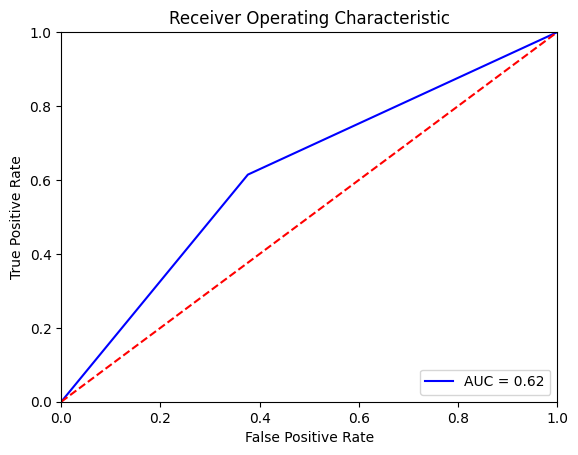

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc


#split the data into train and test
X_train, X_test, y_train, y_test = train_test_split(train_data_en.drop(['malware_status'], axis=1), train_data_en['malware_status'], test_size=0.2, random_state=42)

#display the shape of the train and test data
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

#build the model
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

#predict the model
y_pred = model.predict(X_test)

#display the accuracy score
print(accuracy_score(y_test, y_pred))

#display the confusion matrix
print(confusion_matrix(y_test, y_pred))

#display the classification report
print(classification_report(y_test, y_pred))

#display the roc_auc_score
print(roc_auc_score(y_test, y_pred))

#display the roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:
from sklearn.ensemble import VotingClassifier
from imblearn.over_sampling import SMOTE
smote = SMOTE()
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)
print(X_train_smote.shape)
print(y_train_smote.shape)


#gradient boosting classifier
model_gbc= GradientBoostingClassifier()
model_gbc.fit(X_train,y_train)
y_pred_gbc=model_gbc.predict(X_test)
print("gbc: ", y_pred_gbc)


unique, counts = np.unique(y_pred_gbc, return_counts=True)

#display unique values and counts side by side
print(np.asarray((unique, counts)).T)